In [1]:
import pandas as pd
# 정제(split) 후에 스케일링 (scaled)

In [2]:
fish = pd.read_csv('http://bit.ly/fish_csv_data')

In [3]:
#스케일링 하기 위한 준비 numpy array로 변환
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [4]:
fish_target = fish['Species'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
print(type(fish_target[1]))

<class 'str'>


In [9]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8907563025210085
0.85


In [10]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [11]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [12]:
import numpy as np

In [13]:
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [14]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [15]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
target_bream_smelt

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [17]:
print(lr.score(train_bream_smelt, target_bream_smelt))

1.0


In [18]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [19]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [20]:
print(lr.classes_)

['Bream' 'Smelt']


In [21]:
print(lr.coef_,lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [22]:
param = {'C':[0.001,0.01,0.1,1,10,100],'max_iter':[500,1000,1500]}
train_score=[]
test_score=[]

xLabel = []

for C in param['C']:
    for max_iter in param['max_iter']:
        lr = LogisticRegression(C=C, max_iter=max_iter)
        lr.fit(train_scaled, train_target)

        train_score.append(lr.score(train_scaled, train_target))
        test_score.append(lr.score(test_scaled, test_target))

        xLabel.append(str(C))
                      

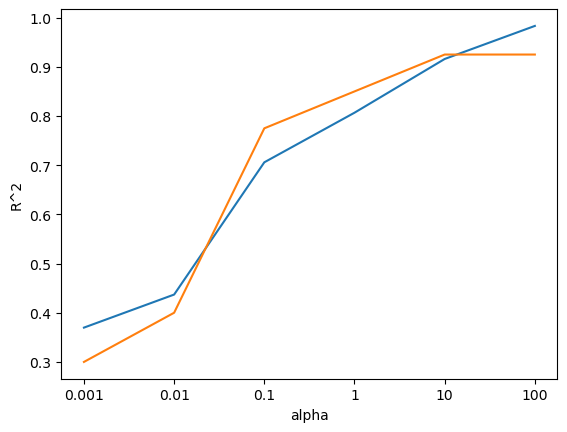

In [23]:
import matplotlib.pyplot as plt

plt.plot(xLabel, train_score)
plt.plot(xLabel, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [26]:
lr = LogisticRegression(C=30 , max_iter=500)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9663865546218487
0.925
